# CBOW word2vec model
CBOW model predicts the center word given the context words.

The input to the model is the word IDs for the context words. These word IDs are fed into a common embedding layer that is initialized with small random weights. Each word ID is transformed into a vector of size (embed_size) by the embedding layer.

Thus, each row of the input context is transformed into a matrix of size (2*window_size, embed_size) by this layer.

This is fed into a lambda layer, which computes an average of all the embeddings. This average is then fed to a dense layer, which creates a dense vector of size (vocab_size) for each row.

![CBOW model](https://i.imgur.com/iJ0H699.png)

In [12]:
%matplotlib inline
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config = config)

from __future__ import print_function
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer, one_hot
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_distances
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
import numpy as np
import operator

np.random.seed(42)
BATCH_SIZE = 128
NUM_EPOCHS = 20

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/andrewwong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
lines = []
# https://gist.github.com/phillipj/4944029
fin = open("alice_in_wonderland.txt", "r")
#############################################################################
# TODO: Write a for loop to read in the corpus.                             #
#############################################################################
for line in fin:
    line =line.strip()
    if len(line)==0:
        continue
    lines.append(line)

#############################################################################
#                          END OF YOUR CODE                                 #
#############################################################################
fin.close()

In [16]:
# for line in fin:
#     line = line.strip()
#     if len(line) == 0:
#         continue
#     lines.append(line)

In [18]:
sents = nltk.sent_tokenize(" ".join(lines))

#############################################################################
# TODO: Use tokenizer to tokenize the corpus.                               #
#############################################################################
tokenizer=Tokenizer(5000)
tokens=tokenizer.fit_on_texts(sents)
vocab_size=len(tokenizer.word_index)+1
#############################################################################
#                          END OF YOUR CODE                                 #
#############################################################################

w_lefts, w_centers, w_rights = [], [], []
for sent in sents:
#############################################################################
# TODO: Create training data for cbow.                                      #
#############################################################################
    embedding = one_hot(sent, vocab_size)
    triples = list(nltk.trigrams(embedding))
    w_lefts.extend([x[0] for x in triples])
    w_centers.extend([x[1] for x in triples])
    w_rights.extend([x[2] for x in triples]) 
#############################################################################
#                          END OF YOUR CODE                                 #
#############################################################################

In [ ]:
# tokenizer = Tokenizer(5000)  # use top 5000 words only
# tokens = tokenizer.fit_on_texts(sents)
# vocab_size = len(tokenizer.word_index) + 1

#     embedding = one_hot(sent, vocab_size)
#     triples = list(nltk.trigrams(embedding))
#     w_lefts.extend([x[0] for x in triples])
#     w_centers.extend([x[1] for x in triples])
#     w_rights.extend([x[2] for x in triples])

In [21]:
ohe = OneHotEncoder(n_values=vocab_size)
#############################################################################
# TODO: Use one hot encoder to fit on the corpus.                           #
#############################################################################
Xleft = ohe.fit_transform(np.array(w_lefts).reshape(-1, 1)).todense()
Xright = ohe.fit_transform(np.array(w_rights).reshape(-1, 1)).todense()
X = (Xleft + Xright) / 2.0
Y = ohe.fit_transform(np.array(w_centers).reshape(-1, 1)).todense()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3,random_state=42)
#############################################################################
#                          END OF YOUR CODE                                 #
#############################################################################
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

model = Sequential()
model.add(Dense(300, input_shape=(Xtrain.shape[1],)))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(Ytrain.shape[1]))
model.add(Activation("softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", 
              metrics=["accuracy"])
history = model.fit(Xtrain, Ytrain, batch_size=BATCH_SIZE, 
                    epochs=NUM_EPOCHS, verbose=1,
                    validation_data=(Xtest, Ytest))

(17202, 2647) (7373, 2647) (17202, 2647) (7373, 2647)
Train on 17202 samples, validate on 7373 samples
Epoch 1/20
17202/17202 [==============================] - 16s 936us/step - loss: 6.5441 - acc: 0.0614 - val_loss: 5.8618 - val_acc: 0.0609
Epoch 2/20
17202/17202 [==============================] - 15s 896us/step - loss: 5.7610 - acc: 0.0630 - val_loss: 5.7782 - val_acc: 0.0609
Epoch 3/20
17202/17202 [==============================] - 14s 802us/step - loss: 5.6666 - acc: 0.0637 - val_loss: 5.7279 - val_acc: 0.0655
Epoch 4/20
17202/17202 [==============================] - 15s 900us/step - loss: 5.5813 - acc: 0.0724 - val_loss: 5.6688 - val_acc: 0.0731
Epoch 5/20
17202/17202 [==============================] - 13s 752us/step - loss: 5.4836 - acc: 0.0820 - val_loss: 5.6000 - val_acc: 0.0769
Epoch 6/20
17202/17202 [==============================] - 13s 768us/step - loss: 5.3895 - acc: 0.0943 - val_loss: 5.5365 - val_acc: 0.0953
Epoch 7/20
17202/17202 [==============================] - 14s 8

In [23]:
# Xleft = ohe.fit_transform(np.array(w_lefts).reshape(-1, 1)).todense()
# Xright = ohe.fit_transform(np.array(w_rights).reshape(-1, 1)).todense()
# X = (Xleft + Xright) / 2.0
# Y = ohe.fit_transform(np.array(w_centers).reshape(-1, 1)).todense()
# Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3,
#                                                 random_state=42)

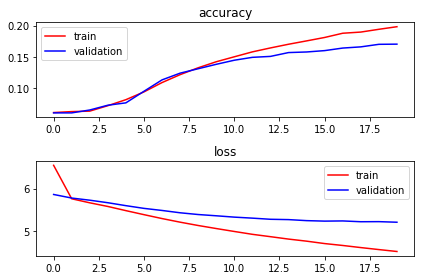

In [24]:
# plot loss function
plt.subplot(211)
plt.title("accuracy")
plt.plot(history.history["acc"], color="r", label="train")
plt.plot(history.history["val_acc"], color="b", label="validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("loss")
plt.plot(history.history["loss"], color="r", label="train")
plt.plot(history.history["val_loss"], color="b", label="validation")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

In [25]:
# evaluate model
score = model.evaluate(Xtest, Ytest, verbose=1)
print("Test score: {:.3f}, accuracy: {:.3f}".format(score[0], score[1]))

# using the word2vec model
word2idx = tokenizer.word_index
idx2word = {v:k for k, v in word2idx.items()}

# retrieve the weights from the first dense layer. This will convert
# the input vector from a one-hot sum of two words to a dense 300 
# dimensional representation
W, b = model.layers[0].get_weights()

idx2emb = {}    
for word in word2idx.keys():
    wid = word2idx[word]
    vec_in = ohe.fit_transform(np.array(wid)).todense()
    vec_emb = np.dot(vec_in, W)
    idx2emb[wid] = vec_emb

for word in ["stupid", "alice", "succeeded"]:
    wid = word2idx[word]
    source_emb = idx2emb[wid]
    distances = []
    for i in range(1, vocab_size):
        if i == wid:
            continue
        target_emb = idx2emb[i]
        distances.append(((wid, i), 
                         cosine_distances(source_emb, target_emb)))
    sorted_distances = sorted(distances, key=operator.itemgetter(1))[0:10]
    predictions = [idx2word[x[0][1]] for x in sorted_distances]
    print("{:s} => {:s}".format(word, ", ".join(predictions)))

7373/7373 [==============================] - 2s 338us/step
Test score: 5.212, accuracy: 0.170
stupid => neatly, you'd, exclamation, she'd, arches, living, sugar, pigs, barking, moderate
alice => bring, confusing, fancy, curtsey, ou, shiver, am, linked, tells, straightened
succeeded => globe, hatter's, lessons, violently, treated, vote, treacle, consider, hard, deny
